#ELM-AE on MNIST Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [10]:
train = pd.read_csv('../DatasetAnalysis/data/processed_train.csv')
valid = pd.read_csv('../DatasetAnalysis/data/processed_tvalidat.csv')

In [11]:
train.shape

(19937, 531)

In [12]:
train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,location_label,location_label_encoded
0,100,100,100,100,100,100,100,100,100,100,...,4.864921e+06,2,1,106,2,2,23,1371713733,1_2,6
1,100,100,100,100,100,100,100,100,100,100,...,4.864934e+06,2,1,106,2,2,23,1371713691,1_2,6
2,100,100,100,100,100,100,100,-97,100,100,...,4.864950e+06,2,1,103,2,2,23,1371714095,1_2,6
3,100,100,100,100,100,100,100,100,100,100,...,4.864934e+06,2,1,102,2,2,23,1371713807,1_2,6
4,100,100,100,100,100,100,100,100,100,100,...,4.864982e+06,0,0,122,2,11,13,1369909710,0_0,0


In [17]:
X_train = train.iloc[:, :520].values
y_train = train['location_label_encoded'].values
X_valid = valid.iloc[:, :520].values
y_valid = valid['location_label_encoded'].values

In [19]:
from utill.data_standar import normalize_rssi,normalize_test_or_valid_data
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categories='auto')
X_train, min_x_val, max_x_val = normalize_rssi(X_train)
y_train = onehotencoder.fit_transform(y_train.reshape(-1,1)).toarray()
X_test = normalize_test_or_valid_data(min_x_val, max_x_val, X_valid)
y_test = onehotencoder.fit_transform(y_valid.reshape(-1,1)).toarray()


In [20]:
y_train.shape

(19937, 13)

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [22]:
#The size of the input layer (no. of input features of the dataset)
input_size = X_train.shape[1]
print(input_size) #28*28

520


#Try initialize value for hidden_size

In [23]:
#The size of the input layer (no. of input features of the dataset)
input_size = X_train.shape[1]
print(input_size) #28*28

#Initialize the no. of hidden neurons
hidden_size = 1000

520


In [24]:
#Initialize the weights and bias randomly
input_weights = np.random.normal(size=[input_size,hidden_size]) #(784, 1000)
biases = np.random.normal(size=[hidden_size]) #(1000,)

In [25]:
#use a Rectified Linear Unit (ReLU) as hidden layer activation
def relu(x):
   return np.maximum(x, 0, x)  #Take an input array x, and for each element in x,if (x>0) keep the original value; otherwise, it replaces the element with 0.

 Create a function in computing the output weights which is β.
 * H = βT
 * The goal is to minimize the least square error between the target (training labels) and the output (predicted labels) using the norm least-squares solution

In [26]:
#Create a function to compute for H vector - H(the hidden layer of our network)
def hidden_nodes(X):
    G = np.dot(X, input_weights)
    G = G + biases
    H = relu(G)
    return H

In [27]:
hidden_nodes(X_train).shape

(19937, 1000)

In [28]:
hidden_nodes(X_train)

array([[ 0.        ,  0.        , 18.85192254, ..., 14.0394163 ,
        13.4587068 ,  0.        ],
       [ 0.        ,  0.        , 17.7546097 , ..., 11.08506869,
        11.30013663,  0.        ],
       [ 0.        ,  0.        , 17.31230097, ...,  9.77633686,
        16.18505853,  0.        ],
       ...,
       [ 0.        ,  0.        , 21.63346379, ...,  3.96576791,
        16.49708054,  0.        ],
       [ 0.        ,  0.        , 15.50608452, ...,  6.8171375 ,
        13.6263993 ,  0.        ],
       [ 0.        ,  0.        , 17.68654233, ...,  7.85542261,
        13.89072217,  0.        ]])

In [29]:
hidden_nodes(X_train)

array([[ 0.        ,  0.        , 18.85192254, ..., 14.0394163 ,
        13.4587068 ,  0.        ],
       [ 0.        ,  0.        , 17.7546097 , ..., 11.08506869,
        11.30013663,  0.        ],
       [ 0.        ,  0.        , 17.31230097, ...,  9.77633686,
        16.18505853,  0.        ],
       ...,
       [ 0.        ,  0.        , 21.63346379, ...,  3.96576791,
        16.49708054,  0.        ],
       [ 0.        ,  0.        , 15.50608452, ...,  6.8171375 ,
        13.6263993 ,  0.        ],
       [ 0.        ,  0.        , 17.68654233, ...,  7.85542261,
        13.89072217,  0.        ]])

In [30]:
y_train.shape

(19937, 13)

In [31]:
y_train.shape

(19937, 13)

In [32]:
np.linalg.pinv(hidden_nodes(X_train)).shape

(1000, 19937)

In [33]:
#Compute β and assign the output matrix to output_weights
output_weights = np.dot(np.linalg.pinv(hidden_nodes(X_train)), y_train) #(1000, 60000)*(60000, 10)= (1000,10)

In [34]:
def predict(X):
    out = hidden_nodes(X)
    out = np.dot(out, output_weights)
    return out

In [35]:
prediction = predict(X_test) #X_test=(10000, 784)
prediction.shape

(1111, 13)

In [36]:
prediction[0]

array([ 30.24374602, -14.35204476, -70.84513643,  41.39068036,
        12.79248673,  -0.41786525,  12.36054245,  34.01791823,
        61.98000844, -18.44518019,  -5.70062106,  29.91866088,
       -13.56980496])

In [37]:
np.argmax(prediction[0])

8

In [38]:
y_test[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
np.argmax(y_test[0])

5

In [40]:
correct = 0
total = X_test.shape[0] #10000
for i in range(total):
    predicted = np.argmax(prediction[i])
    actual = np.argmax(y_test[i])
    correct += 1 if predicted == actual else 0
accuracy = correct/total
print('Accuracy for ', hidden_size, ' hidden nodes: ', accuracy)

Accuracy for  1000  hidden nodes:  0.36543654365436545


#Try different values for hidden_size

In [41]:
import numpy as np

def relu(x):
    return np.maximum(x, 0)

def hidden_nodes(X, input_weights, biases):
    G = np.dot(X, input_weights) + biases
    H = relu(G)
    return H

def predict(X, input_weights, biases, output_weights):
    out = hidden_nodes(X, input_weights, biases)
    out = np.dot(out, output_weights)
    return out


In [42]:
input_size = X_train.shape[1]

hidden_sizes = range(1000, 3001, 1000)
accuracies = []

for hidden_size in hidden_sizes:
    print(f'Training with {hidden_size} hidden nodes')

    # Initialize the weights and biases randomly
    input_weights = np.random.normal(size=[input_size, hidden_size])
    biases = np.random.normal(size=[hidden_size])

    # Compute output weights
    output_weights = np.dot(np.linalg.pinv(hidden_nodes(X_train, input_weights, biases)), y_train)

    # Make predictions on test set
    prediction = predict(X_test, input_weights, biases, output_weights)

    # Calculate accuracy
    correct = 0
    total = X_test.shape[0]
    for i in range(total):
        predicted = np.argmax(prediction[i])
        actual = np.argmax(y_test[i])
        correct += 1 if predicted == actual else 0
    accuracy = correct / total
    accuracies.append(accuracy)
    print(f'Accuracy for {hidden_size} hidden nodes: {accuracy}\n')


Training with 1000 hidden nodes
Accuracy for 1000 hidden nodes: 0.33933393339333934

Training with 2000 hidden nodes
Accuracy for 2000 hidden nodes: 0.05130513051305131

Training with 3000 hidden nodes
Accuracy for 3000 hidden nodes: 0.0927092709270927


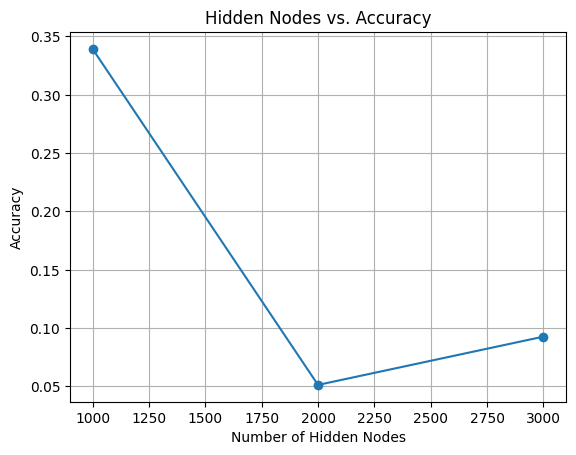

In [43]:
# Plotting the relationship between number of hidden nodes and accuracy
plt.plot(hidden_sizes, accuracies, marker='o')
plt.title('Hidden Nodes vs. Accuracy')
plt.xlabel('Number of Hidden Nodes')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

#Image reconstruction(Treat as Autoencoder where the input and output are the same with ELM)

In [44]:
def relu(x):
    return np.maximum(x, 0)

def hidden_nodes(X, input_weights, biases):
    G = np.dot(X, input_weights) + biases
    H = relu(G)
    return H

def predict(X, input_weights, biases, output_weights):
    out = hidden_nodes(X, input_weights, biases)
    out = np.dot(out, output_weights)
    return out


In [45]:
input_size = X_train.shape[1]
hidden_size = 1000

# Initialize the weights and biases randomly
input_weights = np.random.normal(size=[input_size, hidden_size]) #(784, 1000)
biases = np.random.normal(size=[hidden_size]) #(1000,)

In [46]:
hidden_nodes(X_train, input_weights, biases).shape

(19937, 1000)

In [47]:
X_train.shape

(19937, 520)

In [48]:
# Compute output weights for reconstruction.
# In autoencoder, output size is same as input size
output_weights = np.dot(np.linalg.pinv(hidden_nodes(X_train, input_weights, biases)), X_train)
print(output_weights.shape)

(1000, 520)


In [49]:
# Make predictions on input data
reconstructed_images = predict(X_train, input_weights, biases, output_weights)

ValueError: cannot reshape array of size 520 into shape (28,28)

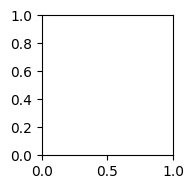

In [50]:
# Show original and reconstructed images
num_images = 10
plt.figure(figsize=(20, 4))
for i in range(num_images):
    # Display original images
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(X_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(reconstructed_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
